**Data

In [4]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("DATA200001_VIC1.csv")

# Convert SETTLEMENTDATE to datetime
df['SETTLEMENTDATE'] = pd.to_datetime(df['SETTLEMENTDATE'], format="%Y/%m/%d %H:%M")

# View unique regions
print("Regions:", df['REGION'].unique())

# Extract just the date (drop time) if you want daily aggregation
df['DATE'] = df['SETTLEMENTDATE'].dt.date

# Example: average demand and price per day
daily_avg = df.groupby('DATE', as_index=False)[['TOTALDEMAND', 'RRP']].mean()
print(daily_avg.head())

# Check for missing values
print("Missing values:\n", df.isnull().sum())


Regions: ['VIC1']
         DATE  TOTALDEMAND        RRP
0  2000-01-01  3844.394539   9.669787
1  2000-01-02  4025.508472  10.624375
2  2000-01-03  4204.808055  10.824375
3  2000-01-04  4537.608264  13.581042
4  2000-01-05  4620.539410  14.431667
Missing values:
 REGION            0
SETTLEMENTDATE    0
TOTALDEMAND       0
RRP               0
PERIODTYPE        0
DATE              0
dtype: int64


Plotting with dates

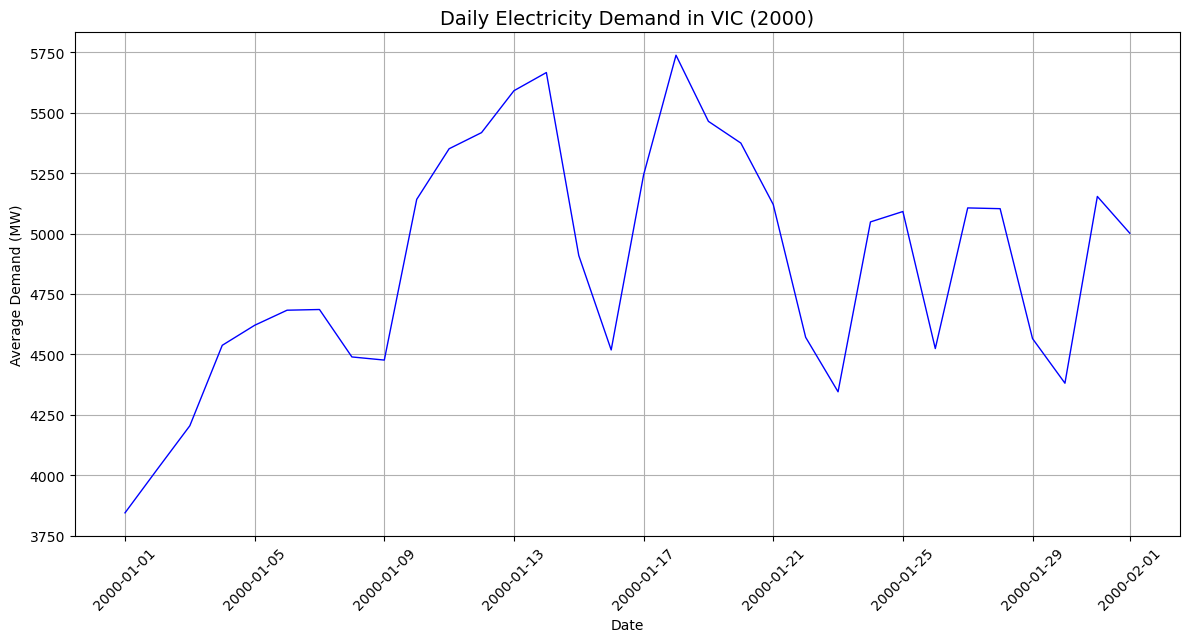

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and prepare the data
df = pd.read_csv("DATA200001_VIC1.csv")
df['SETTLEMENTDATE'] = pd.to_datetime(df['SETTLEMENTDATE'], format="%Y/%m/%d %H:%M")
df['DATE'] = df['SETTLEMENTDATE'].dt.date

# Group by date and get average demand
daily_avg = df.groupby('DATE', as_index=False)['TOTALDEMAND'].mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_avg['DATE'], daily_avg['TOTALDEMAND'], color='blue', linewidth=1)
plt.title('Daily Electricity Demand in VIC (2000)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Average Demand (MW)')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


Plotting with 30 min times

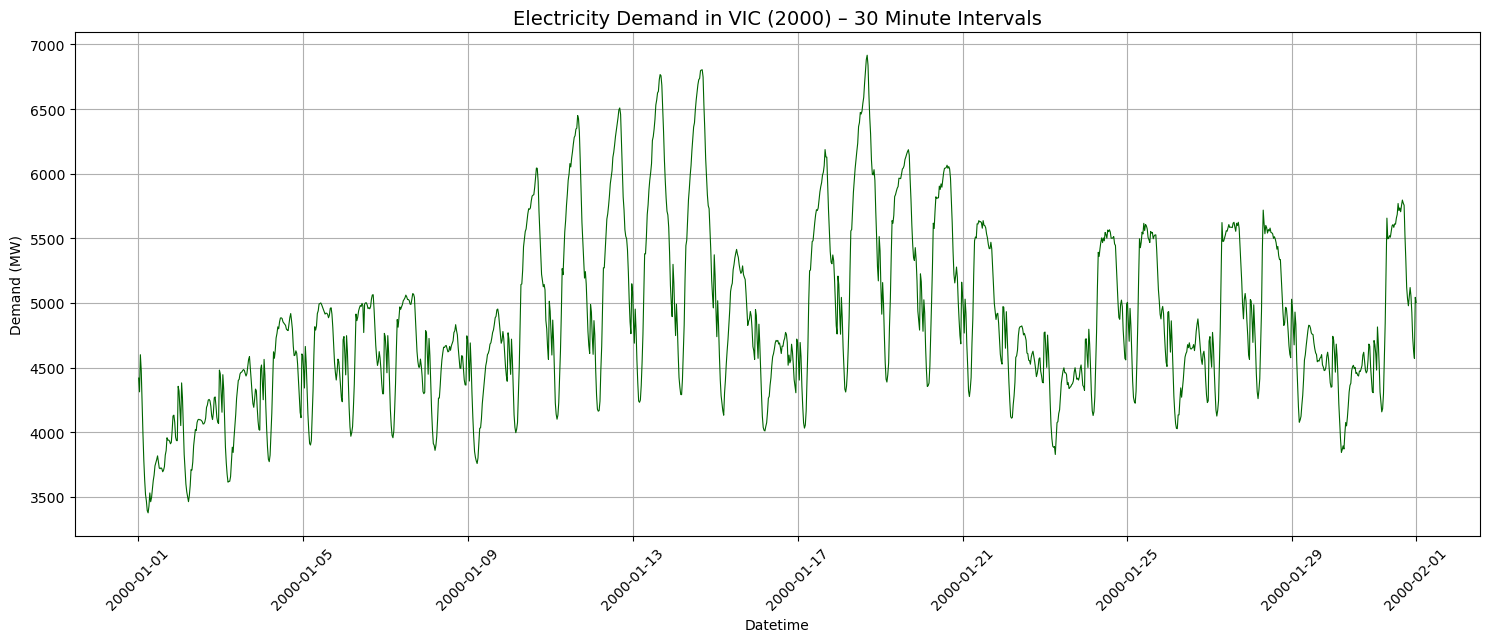

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and prepare the data
df = pd.read_csv("DATA200001_VIC1.csv")
df['SETTLEMENTDATE'] = pd.to_datetime(df['SETTLEMENTDATE'], format="%Y/%m/%d %H:%M")

# Plot 30-minute interval demand
plt.figure(figsize=(15, 6))
plt.plot(df['SETTLEMENTDATE'], df['TOTALDEMAND'], color='darkgreen', linewidth=0.8)
plt.title('Electricity Demand in VIC (2000) – 30 Minute Intervals', fontsize=14)
plt.xlabel('Datetime')
plt.ylabel('Demand (MW)')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()
